In [27]:
import pandas as pd
import time

# Record the start time
start_time = time.time()

try:
     # Read the CSV file
    df = pd.read_csv('cleaned_data.csv')

    # Record the end time
    end_time = time.time()
    # Calculate the loading time
    pandas_loading_time = end_time - start_time
    print(f"Pandas Loading Time: {pandas_loading_time:.4f} seconds")
    
except FileNotFoundError:
    print("Error: 'cleaned_data.csv' not found. Please ensure the file exists in the current directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Pandas Loading Time: 8.9940 seconds


In [29]:
print (df.shape)

(933546, 46)


1. Customer Demographics:

C:\Users\aasha\AppData\Local\Temp\ipykernel_5320\1272310800.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='sexo', palette='Set2', ax=ax2)
C:\Users\aasha\AppData\Local\Temp\ipykernel_5320\1272310800.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_provinces.values, y=top_provinces.index, palette='viridis', ax=ax3)
C:\Users\aasha\AppData\Local\Temp\ipykernel_5320\1272310800.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='sexo', y='age', palette='Set3', ax=ax4)


(<Figure size 1200x600 with 1 Axes>,
 <Figure size 1200x600 with 1 Axes>,
 <Figure size 1200x600 with 1 Axes>,
 <Figure size 1200x600 with 1 Axes>,
 <Figure size 1400x800 with 2 Axes>)

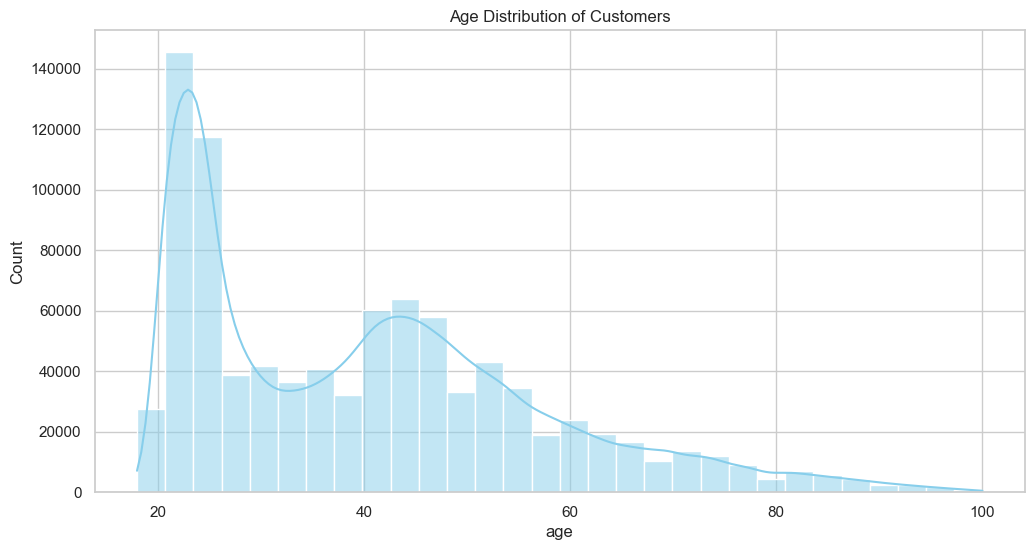

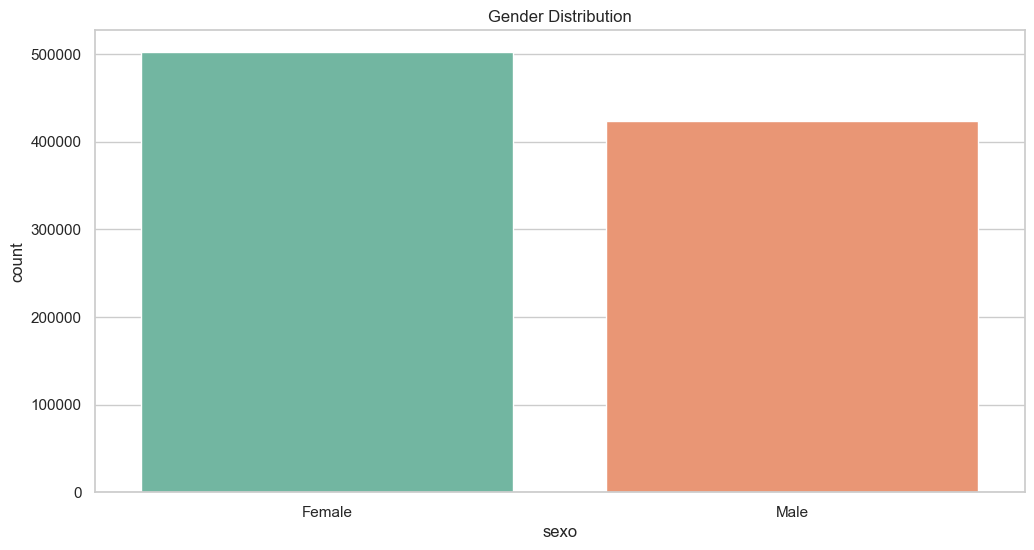

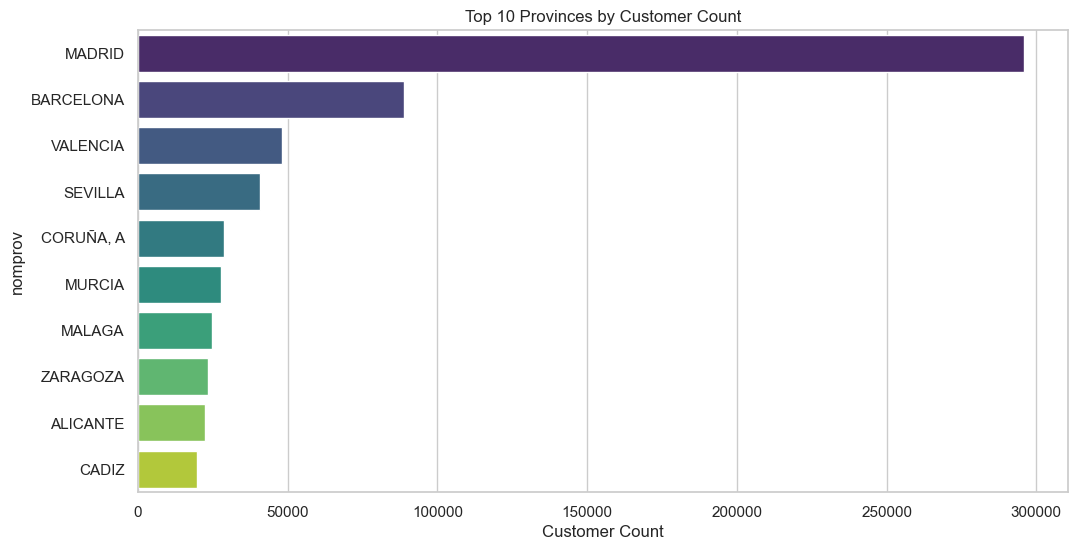

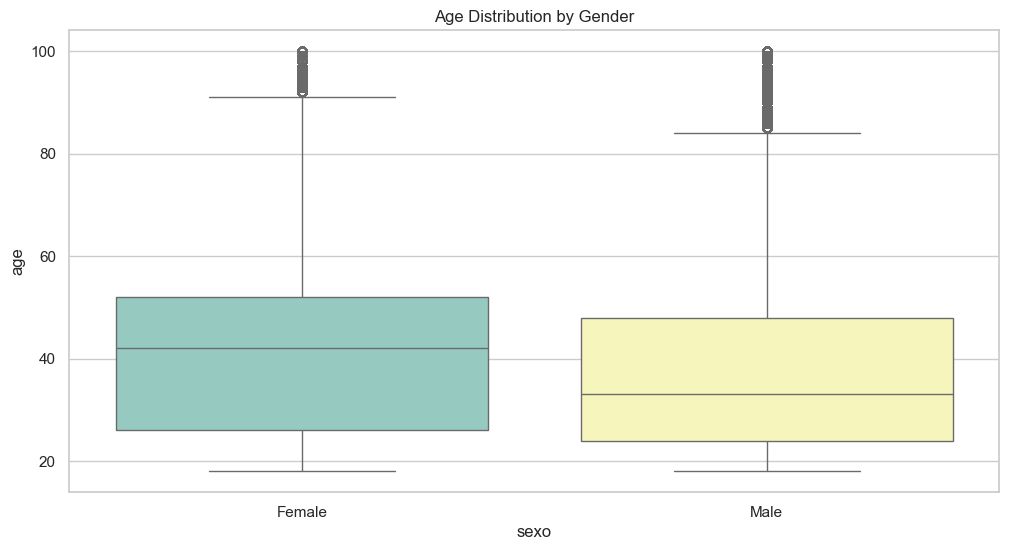

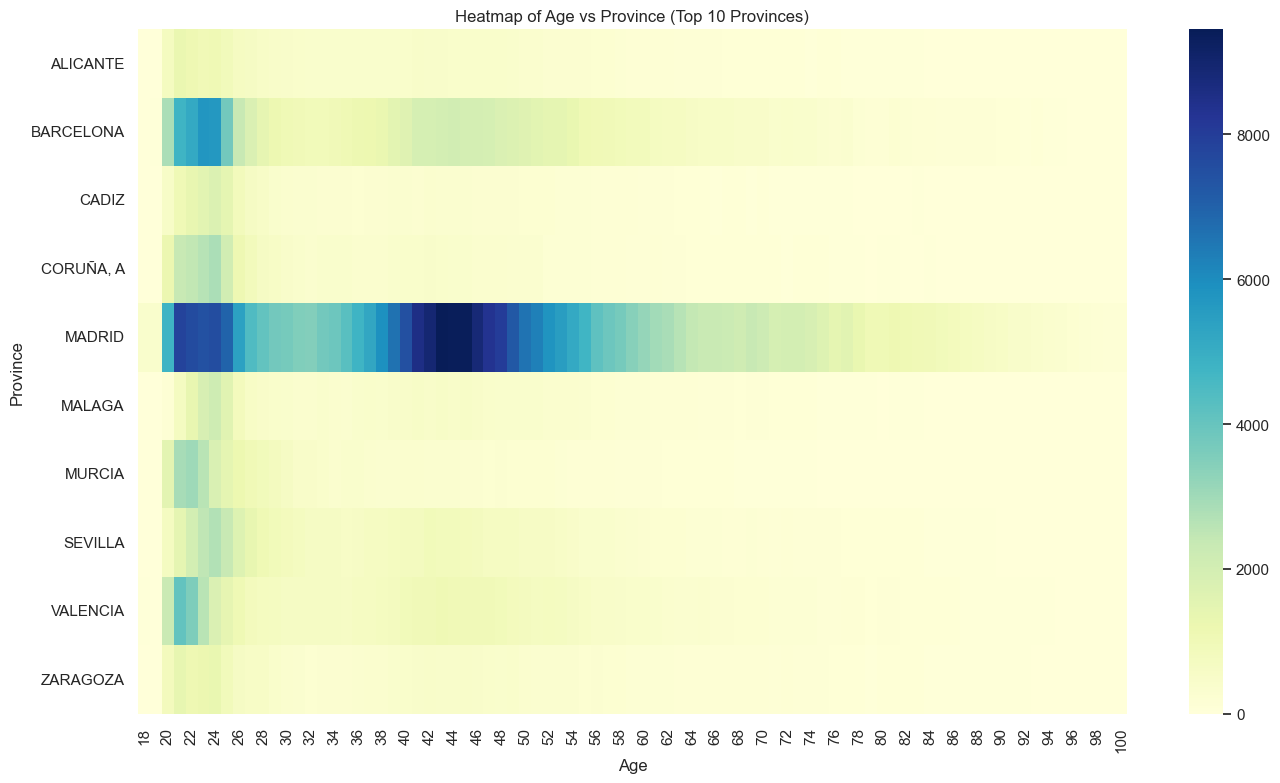

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Clean age values: remove extreme outliers
df_clean = df[df['age'].between(18, 100)]

# Gender Distribution
gender_counts = df_clean['sexo'].value_counts()

# Province Distribution
top_provinces = df_clean['nomprov'].value_counts().head(10)

# Group age by province
age_by_prov = df_clean[df_clean['nomprov'].isin(top_provinces.index)]

# Plot 1: Histogram of Age
fig1, ax1 = plt.subplots()
sns.histplot(df_clean['age'], bins=30, kde=True, color='skyblue', ax=ax1)
ax1.set_title('Age Distribution of Customers')

# Plot 2: Bar Chart of Gender Counts
fig2, ax2 = plt.subplots()
sns.countplot(data=df_clean, x='sexo', palette='Set2', ax=ax2)
ax2.set_title('Gender Distribution')

# Plot 3: Top 10 Provinces
fig3, ax3 = plt.subplots()
sns.barplot(x=top_provinces.values, y=top_provinces.index, palette='viridis', ax=ax3)
ax3.set_title('Top 10 Provinces by Customer Count')
ax3.set_xlabel('Customer Count')

# Plot 4: Age by Gender Boxplot
fig4, ax4 = plt.subplots()
sns.boxplot(data=df_clean, x='sexo', y='age', palette='Set3', ax=ax4)
ax4.set_title('Age Distribution by Gender')

# Plot 5: Heatmap - Age vs Province (Top Provinces)
age_heatmap_data = age_by_prov.groupby(['nomprov', 'age']).size().unstack(fill_value=0)
fig5, ax5 = plt.subplots(figsize=(14, 8))
sns.heatmap(age_heatmap_data, cmap="YlGnBu", ax=ax5)
ax5.set_title('Heatmap of Age vs Province (Top 10 Provinces)')
ax5.set_xlabel('Age')
ax5.set_ylabel('Province')

plt.tight_layout()
(fig1, fig2, fig3, fig4, fig5)

2: Product Adoption Rates:

C:\Users\aasha\AppData\Local\Temp\ipykernel_5320\3649969432.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_adoption.index, y=product_adoption.values, palette='coolwarm', ax=ax1)


(<Figure size 1400x600 with 1 Axes>, <Figure size 800x800 with 1 Axes>)

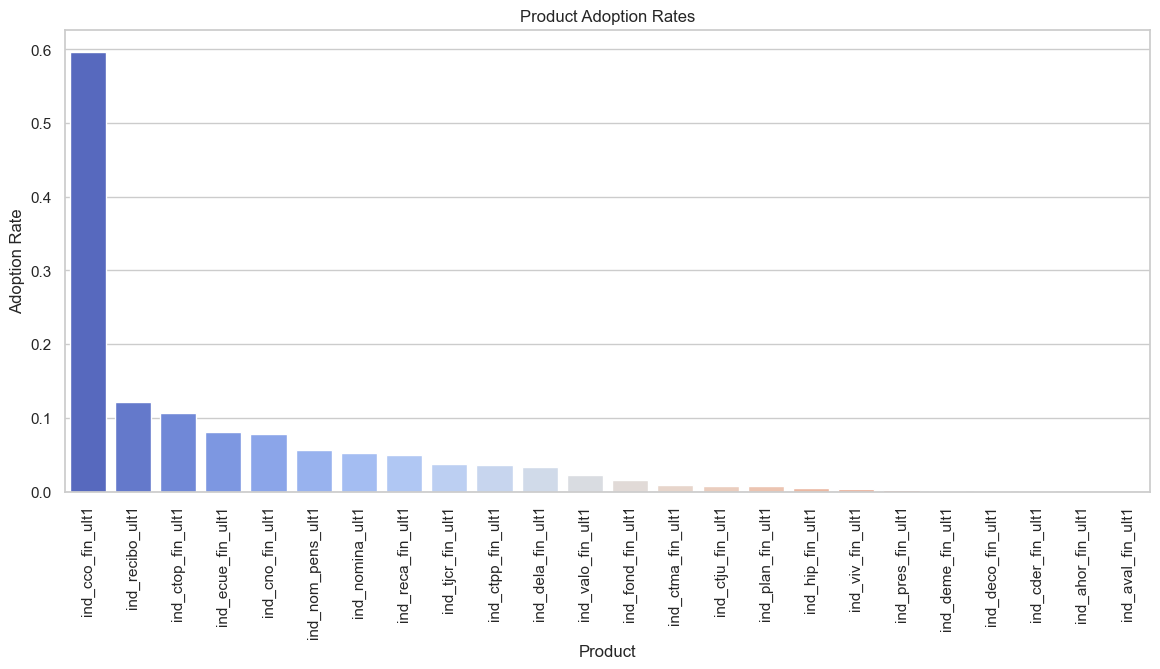

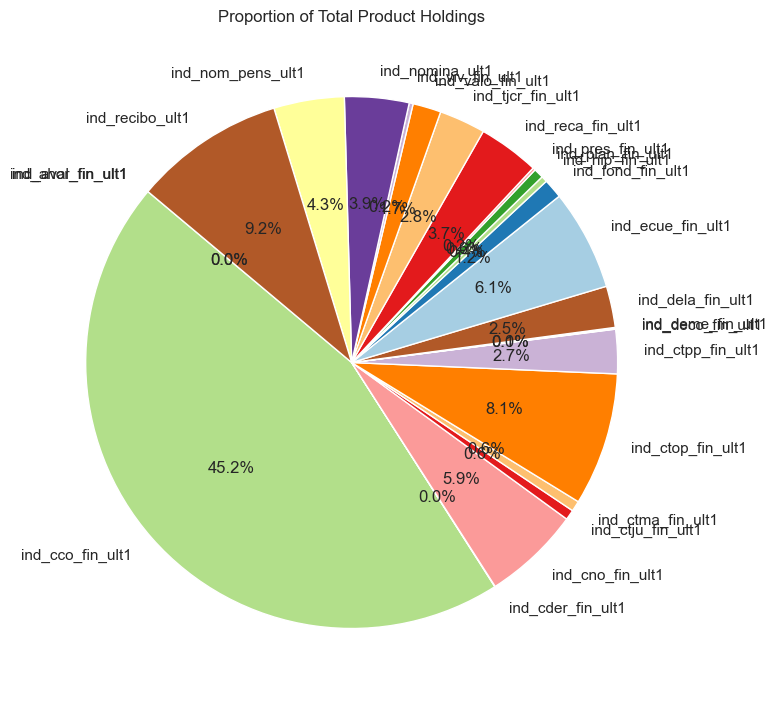

In [6]:
# Extract product columns
product_columns = df.columns[22:]

# Calculate product adoption rates (mean of binary values)
product_adoption = df[product_columns].mean().sort_values(ascending=False)

# Plot 1: Bar Chart of Product Adoption Rates
fig1, ax1 = plt.subplots(figsize=(14, 6))
sns.barplot(x=product_adoption.index, y=product_adoption.values, palette='coolwarm', ax=ax1)
ax1.set_title('Product Adoption Rates')
ax1.set_ylabel('Adoption Rate')
ax1.set_xlabel('Product')
ax1.tick_params(axis='x', rotation=90)

# Plot 2: Pie Chart of Total Product Holdings
total_product_counts = df[product_columns].sum()
fig2, ax2 = plt.subplots(figsize=(8, 8))
ax2.pie(total_product_counts, labels=total_product_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Paired'))
ax2.set_title('Proportion of Total Product Holdings')

plt.tight_layout()
(fig1, fig2)

3: Product Ownership by Segment:

C:\Users\aasha\AppData\Local\Temp\ipykernel_5320\3533372131.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_ownership = df.groupby('age_group')[product_columns].mean()


(<Figure size 1400x400 with 2 Axes>,
 <Figure size 1400x600 with 2 Axes>,
 <Figure size 1400x500 with 2 Axes>)

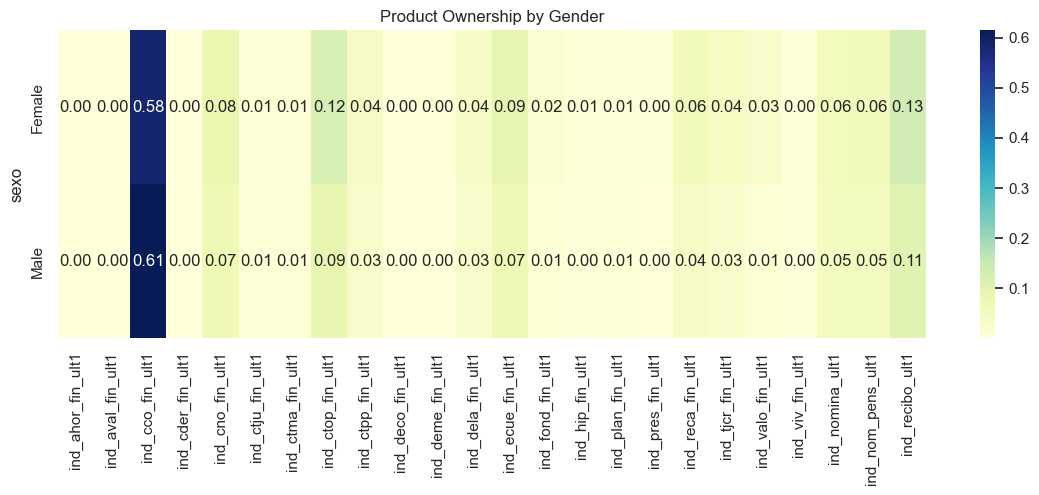

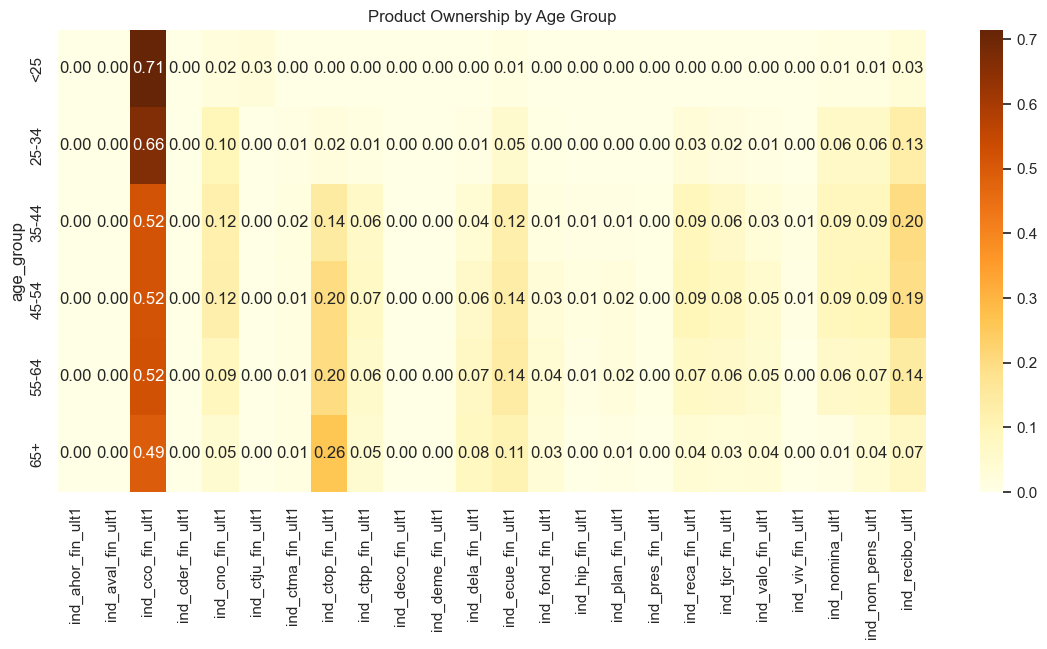

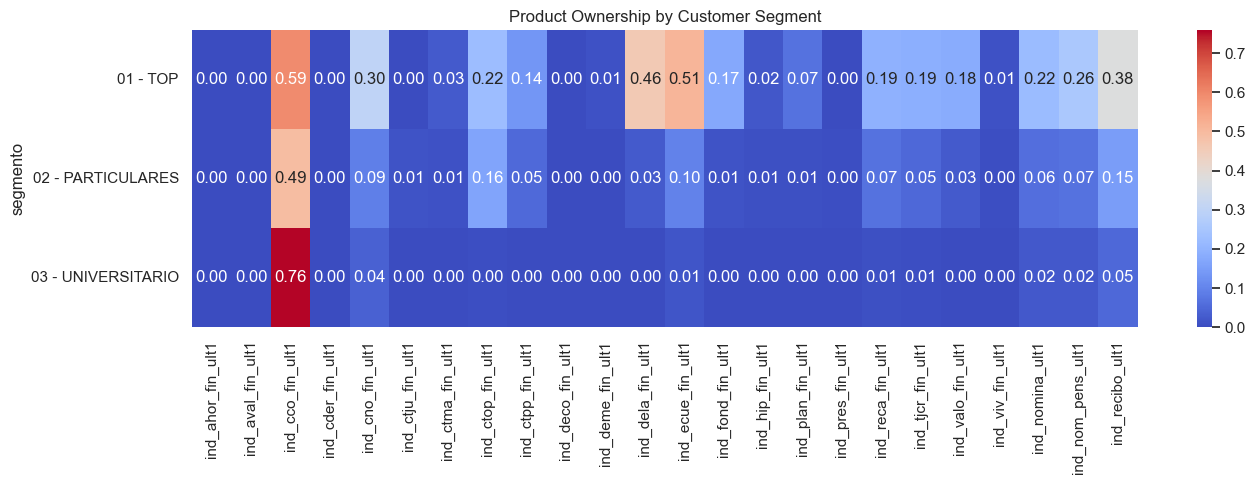

In [8]:
# Create age bins
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 65, 100], 
                         labels=['<25', '25-34', '35-44', '45-54', '55-64', '65+'])

# Prepare product data
product_columns = df.columns[22:46]

# 1. Product Ownership by Gender
gender_ownership = df.groupby('sexo')[product_columns].mean()

# 2. Product Ownership by Age Group
age_ownership = df.groupby('age_group')[product_columns].mean()

# 3. Product Ownership by Segment
segment_ownership = df.groupby('segmento')[product_columns].mean()

# Plot 1: Heatmap - Gender
fig1, ax1 = plt.subplots(figsize=(14, 4))
sns.heatmap(gender_ownership, cmap='YlGnBu', annot=True, fmt=".2f", ax=ax1)
ax1.set_title('Product Ownership by Gender')

# Plot 2: Heatmap - Age Group
fig2, ax2 = plt.subplots(figsize=(14, 6))
sns.heatmap(age_ownership, cmap='YlOrBr', annot=True, fmt=".2f", ax=ax2)
ax2.set_title('Product Ownership by Age Group')

# Plot 3: Heatmap - Customer Segment
fig3, ax3 = plt.subplots(figsize=(14, 5))
sns.heatmap(segment_ownership, cmap='coolwarm', annot=True, fmt=".2f", ax=ax3)
ax3.set_title('Product Ownership by Customer Segment')

plt.tight_layout()
(fig1, fig2, fig3)

4: Customer Lifetime Value Proxies:

C:\Users\aasha\AppData\Local\Temp\ipykernel_5320\1004553852.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='segmento', y='clv_proxy', palette='Set2', ax=ax2)


(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1200x600 with 1 Axes>,
 <Figure size 600x500 with 2 Axes>)

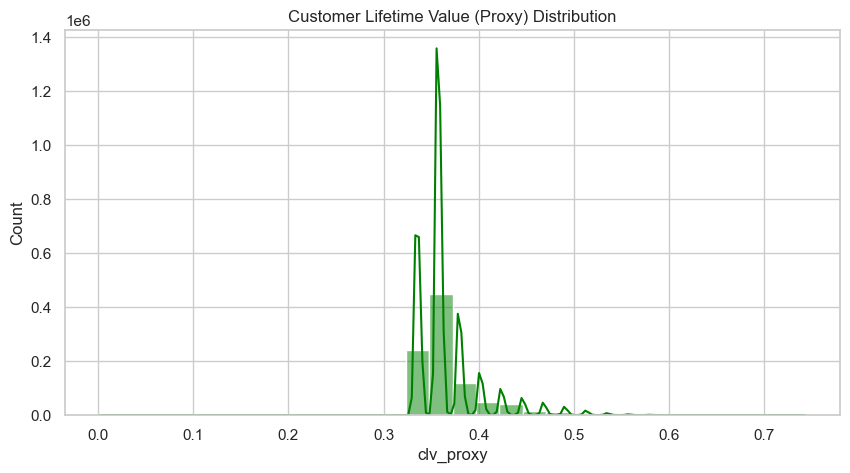

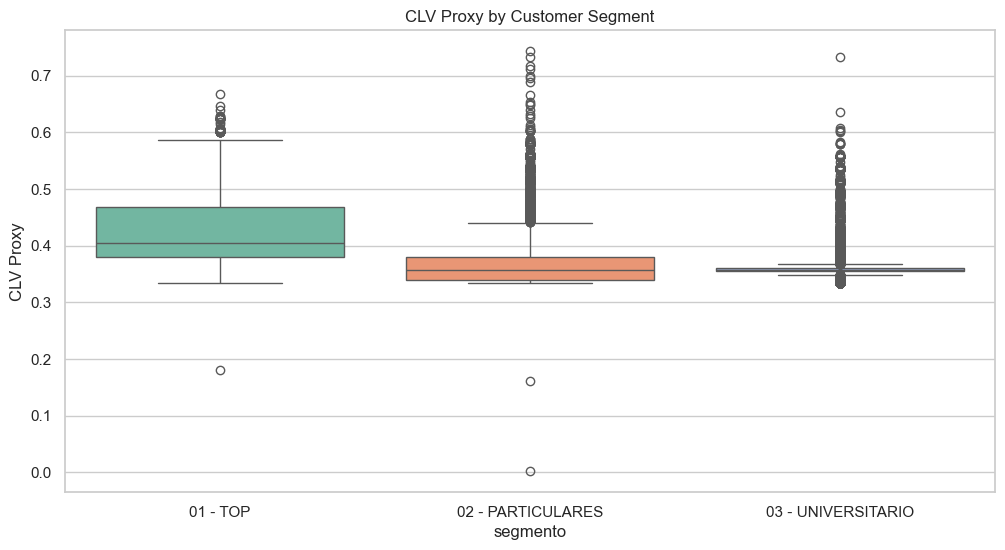

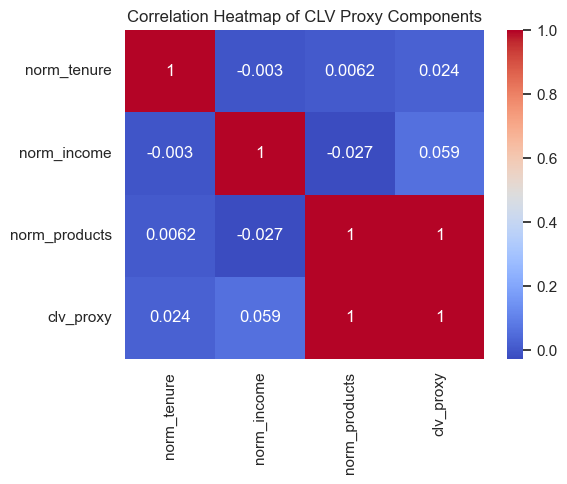

In [10]:
# Create a proxy for Customer Lifetime Value (CLV)
# Components: Tenure (antiguedad), Income (renta), Product Count

# Calculate total products held by each customer
df['total_products'] = df[product_columns].sum(axis=1)

# Normalize components to a [0,1] scale for fair weighting
df['norm_tenure'] = (df['antiguedad'] - df['antiguedad'].min()) / (df['antiguedad'].max() - df['antiguedad'].min())
df['norm_income'] = (df['renta'] - df['renta'].min()) / (df['renta'].max() - df['renta'].min())
df['norm_products'] = (df['total_products'] - df['total_products'].min()) / (df['total_products'].max() - df['total_products'].min())

# Compute CLV Proxy (equal weighting)
df['clv_proxy'] = (df['norm_tenure'] + df['norm_income'] + df['norm_products']) / 3

# Visualizations:
# 1. Distribution of CLV Proxy
fig1, ax1 = plt.subplots(figsize=(10, 5))
sns.histplot(df['clv_proxy'], bins=30, kde=True, color='green', ax=ax1)
ax1.set_title('Customer Lifetime Value (Proxy) Distribution')

# 2. Boxplot of CLV Proxy by Segment
fig2, ax2 = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='segmento', y='clv_proxy', palette='Set2', ax=ax2)
ax2.set_title('CLV Proxy by Customer Segment')
ax2.set_ylabel('CLV Proxy')

# 3. Heatmap of Correlations between components
fig3, ax3 = plt.subplots(figsize=(6, 5))
clv_components = df[['norm_tenure', 'norm_income', 'norm_products', 'clv_proxy']]
sns.heatmap(clv_components.corr(), annot=True, cmap='coolwarm', ax=ax3)
ax3.set_title('Correlation Heatmap of CLV Proxy Components')

plt.tight_layout()
(fig1, fig2, fig3)

5: Churn Indicators:

C:\Users\aasha\AppData\Local\Temp\ipykernel_5320\1320418639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index.map({0: 'Retained', 1: 'Churned'}), y=churn_counts.values, palette='RdYlGn', ax=ax1)
C:\Users\aasha\AppData\Local\Temp\ipykernel_5320\1320418639.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churned', y='age', ax=axes[0], palette='Set3')
C:\Users\aasha\AppData\Local\Temp\ipykernel_5320\1320418639.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churned', y='antiguedad', ax=axes

(<Figure size 600x500 with 1 Axes>,
 <Figure size 1800x600 with 3 Axes>,
 <Figure size 1400x600 with 1 Axes>)

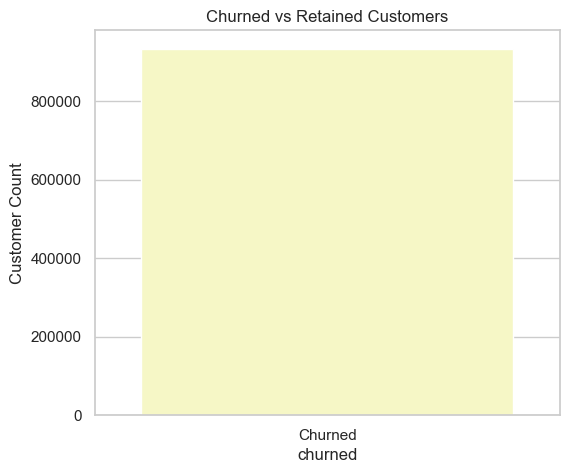

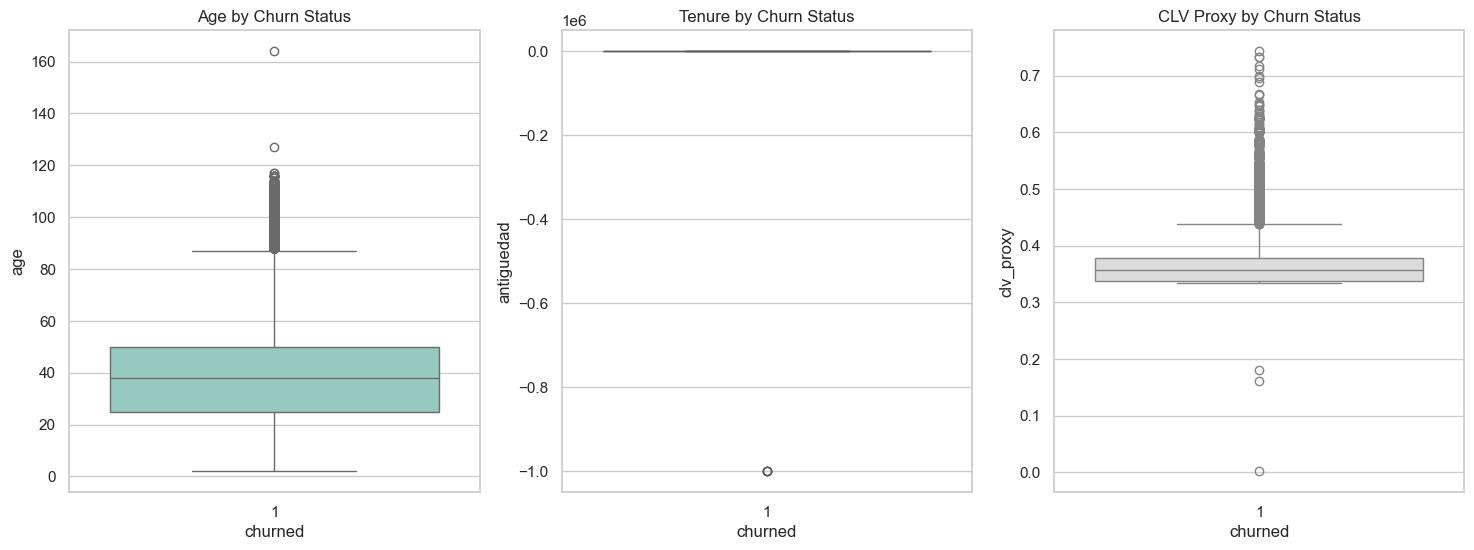

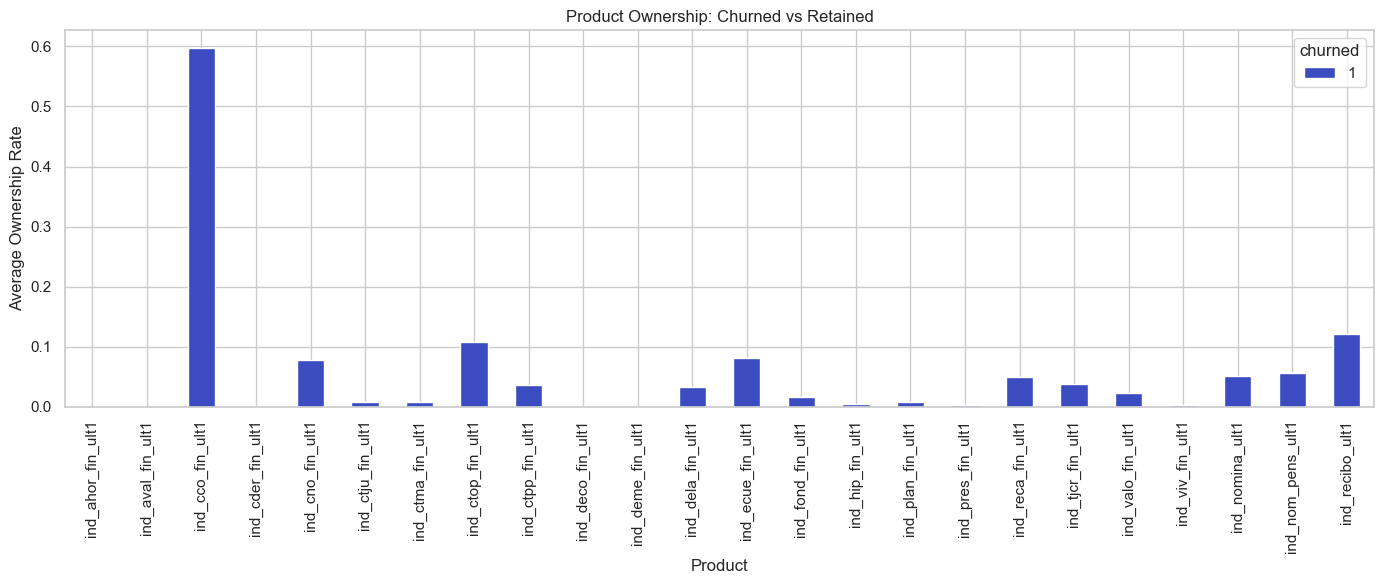

In [14]:
# Plot 1: Churned vs Retained Customers
fig1, ax1 = plt.subplots(figsize=(6, 5))
sns.barplot(x=churn_counts.index.map({0: 'Retained', 1: 'Churned'}), y=churn_counts.values, palette='RdYlGn', ax=ax1)
ax1.set_title('Churned vs Retained Customers')
ax1.set_ylabel('Customer Count')

# Boxplot comparisons: Age, Tenure, CLV
fig2, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(data=df, x='churned', y='age', ax=axes[0], palette='Set3')
axes[0].set_title('Age by Churn Status')

sns.boxplot(data=df, x='churned', y='antiguedad', ax=axes[1], palette='Set2')
axes[1].set_title('Tenure by Churn Status')

sns.boxplot(data=df, x='churned', y='clv_proxy', ax=axes[2], palette='coolwarm')
axes[2].set_title('CLV Proxy by Churn Status')

# Product drop-off: average product count for churned vs retained
product_avg_by_churn = df.groupby('churned')[product_columns].mean().T

fig3, ax3 = plt.subplots(figsize=(14, 6))
product_avg_by_churn.plot(kind='bar', ax=ax3, colormap='coolwarm')
ax3.set_title('Product Ownership: Churned vs Retained')
ax3.set_ylabel('Average Ownership Rate')
ax3.set_xlabel('Product')
plt.xticks(rotation=90)

plt.tight_layout()
(fig1, fig2, fig3)


6: Channel Effectiveness:

C:\Users\aasha\AppData\Local\Temp\ipykernel_5320\2154074670.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_summary.index, y='Customer Count', data=channel_summary, palette='Blues_d', ax=ax1)
C:\Users\aasha\AppData\Local\Temp\ipykernel_5320\2154074670.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\aasha\AppData\Local\Temp\ipykernel_5320\2154074670.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_summary.index, y='Avg CLV Proxy', data=channel_summary, palette='Greens_d', ax=ax2)
C:\Users\aasha\AppD

(<Figure size 1200x600 with 1 Axes>,
 <Figure size 1200x600 with 1 Axes>,
 <Figure size 1200x600 with 1 Axes>)

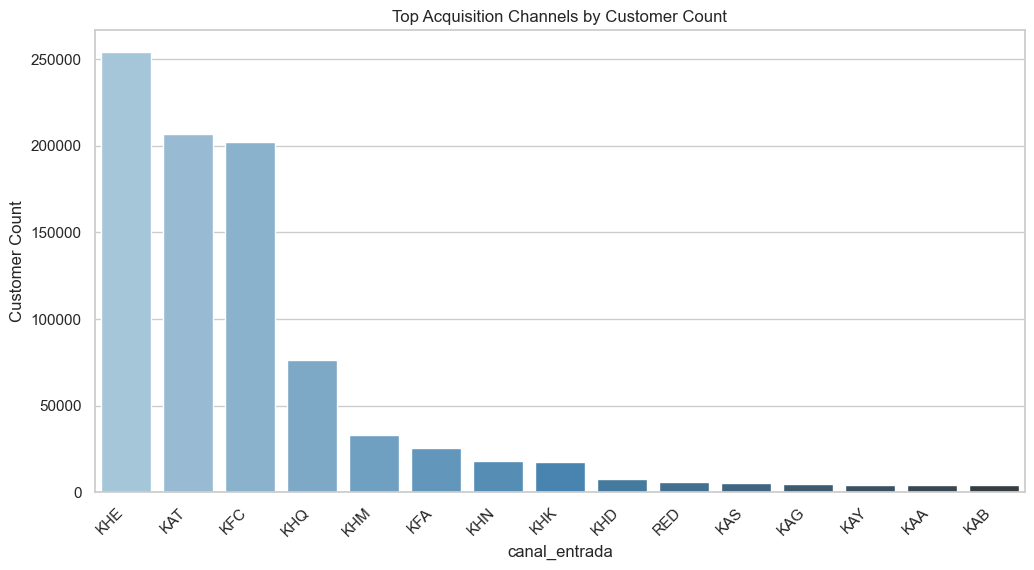

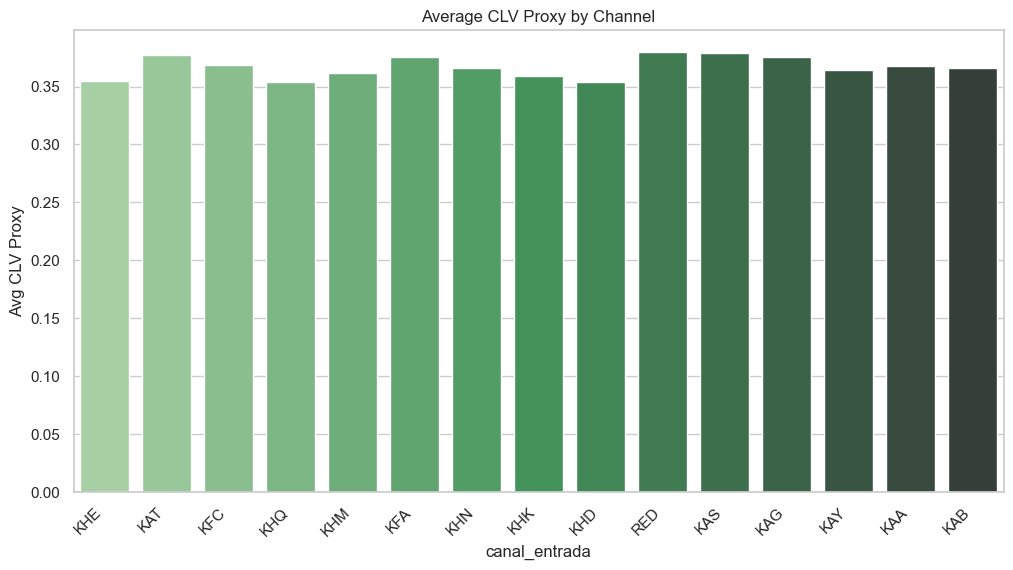

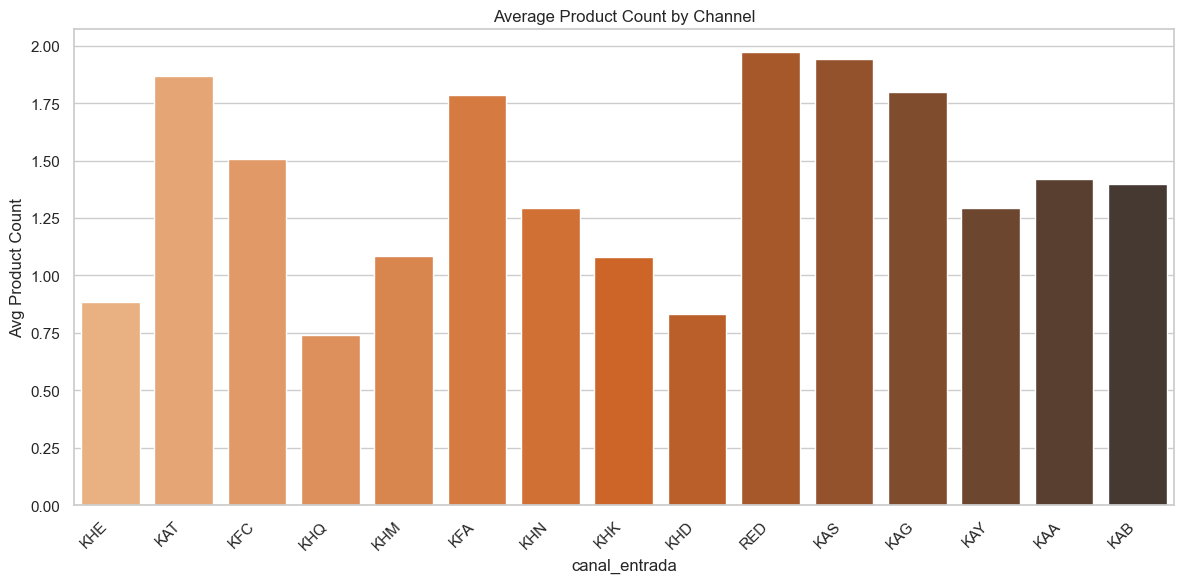

In [16]:
# Group by acquisition channel
channel_group = df.groupby('canal_entrada')

# Metrics to analyze:
channel_counts = channel_group.size().sort_values(ascending=False)
channel_clv = channel_group['clv_proxy'].mean()
channel_products = channel_group['total_products'].mean()

# Combine into a summary DataFrame
channel_summary = pd.DataFrame({
    'Customer Count': channel_counts,
    'Avg CLV Proxy': channel_clv,
    'Avg Product Count': channel_products
}).sort_values(by='Customer Count', ascending=False).head(15)  # focus on top 15 channels

# Plot 1: Customer Count by Channel
fig1, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x=channel_summary.index, y='Customer Count', data=channel_summary, palette='Blues_d', ax=ax1)
ax1.set_title('Top Acquisition Channels by Customer Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Plot 2: Average CLV Proxy by Channel
fig2, ax2 = plt.subplots(figsize=(12, 6))
sns.barplot(x=channel_summary.index, y='Avg CLV Proxy', data=channel_summary, palette='Greens_d', ax=ax2)
ax2.set_title('Average CLV Proxy by Channel')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Plot 3: Average Product Count by Channel
fig3, ax3 = plt.subplots(figsize=(12, 6))
sns.barplot(x=channel_summary.index, y='Avg Product Count', data=channel_summary, palette='Oranges_d', ax=ax3)
ax3.set_title('Average Product Count by Channel')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
(fig1, fig2, fig3)

7: Income Analysis:

C:\Users\aasha\AppData\Local\Temp\ipykernel_5320\3993059329.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=income_df, x='segmento', y='renta', palette='Pastel1', ax=ax2)


(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1200x600 with 1 Axes>,
 <Figure size 1000x600 with 1 Axes>)

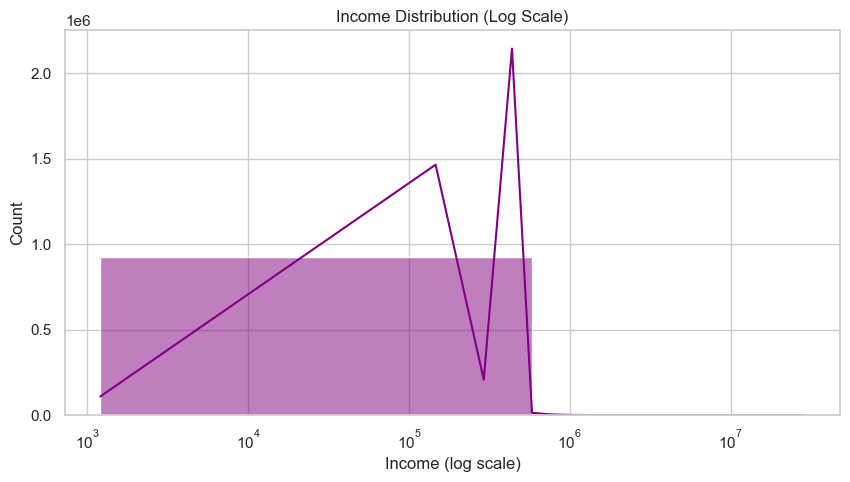

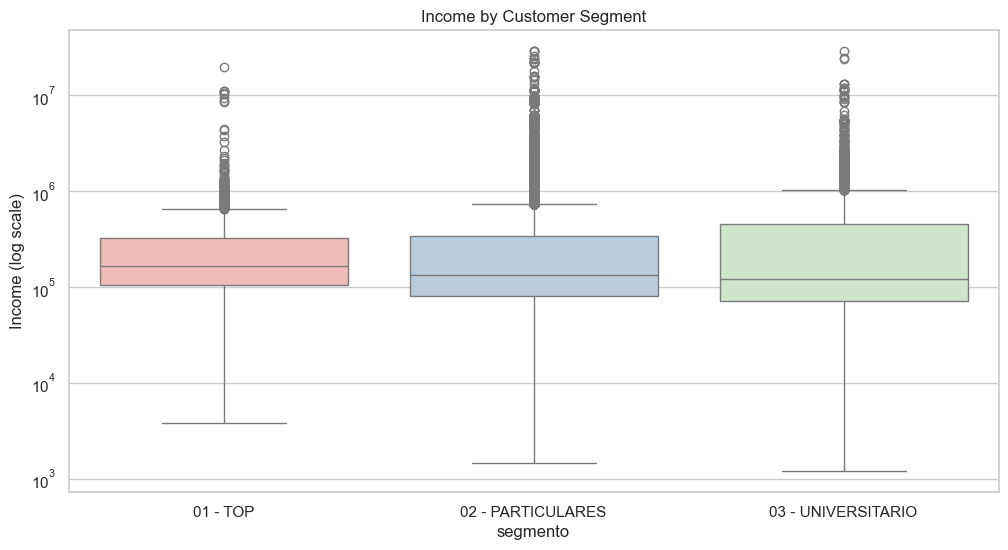

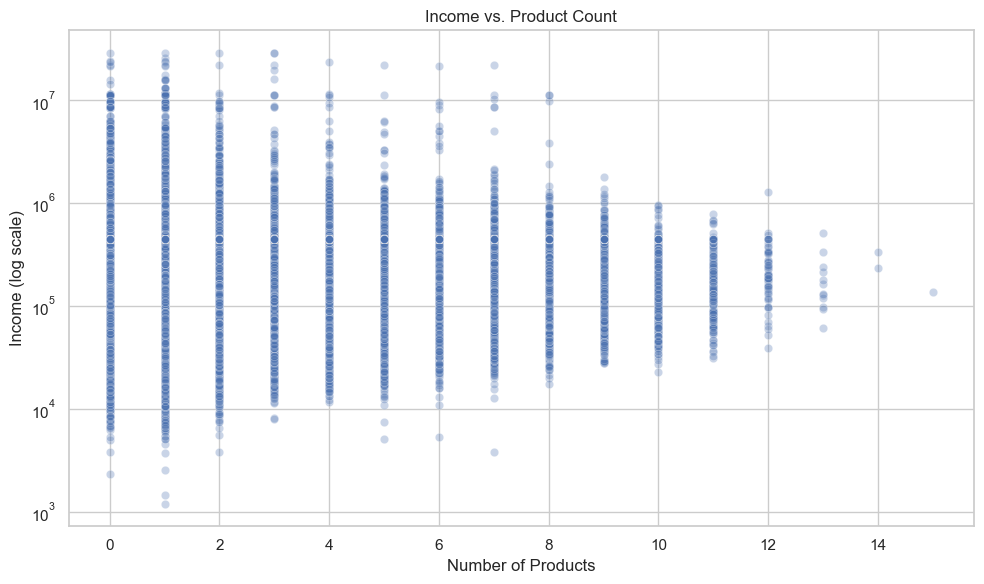

In [18]:
# Drop NaN income values for analysis
income_df = df[df['renta'].notnull()]

# Plot 1: Income Distribution (Log Scale due to skewness)
fig1, ax1 = plt.subplots(figsize=(10, 5))
sns.histplot(income_df['renta'], bins=50, kde=True, color='purple', ax=ax1)
ax1.set_xscale('log')
ax1.set_title('Income Distribution (Log Scale)')
ax1.set_xlabel('Income (log scale)')

# Plot 2: Boxplot of Income by Segment
fig2, ax2 = plt.subplots(figsize=(12, 6))
sns.boxplot(data=income_df, x='segmento', y='renta', palette='Pastel1', ax=ax2)
ax2.set_yscale('log')
ax2.set_title('Income by Customer Segment')
ax2.set_ylabel('Income (log scale)')

# Plot 3: Correlation between Income and Product Count
fig3, ax3 = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=income_df, x='total_products', y='renta', alpha=0.3, ax=ax3)
ax3.set_yscale('log')
ax3.set_title('Income vs. Product Count')
ax3.set_ylabel('Income (log scale)')
ax3.set_xlabel('Number of Products')

plt.tight_layout()
(fig1, fig2, fig3)

8: Product Co-Ownership Patterns:

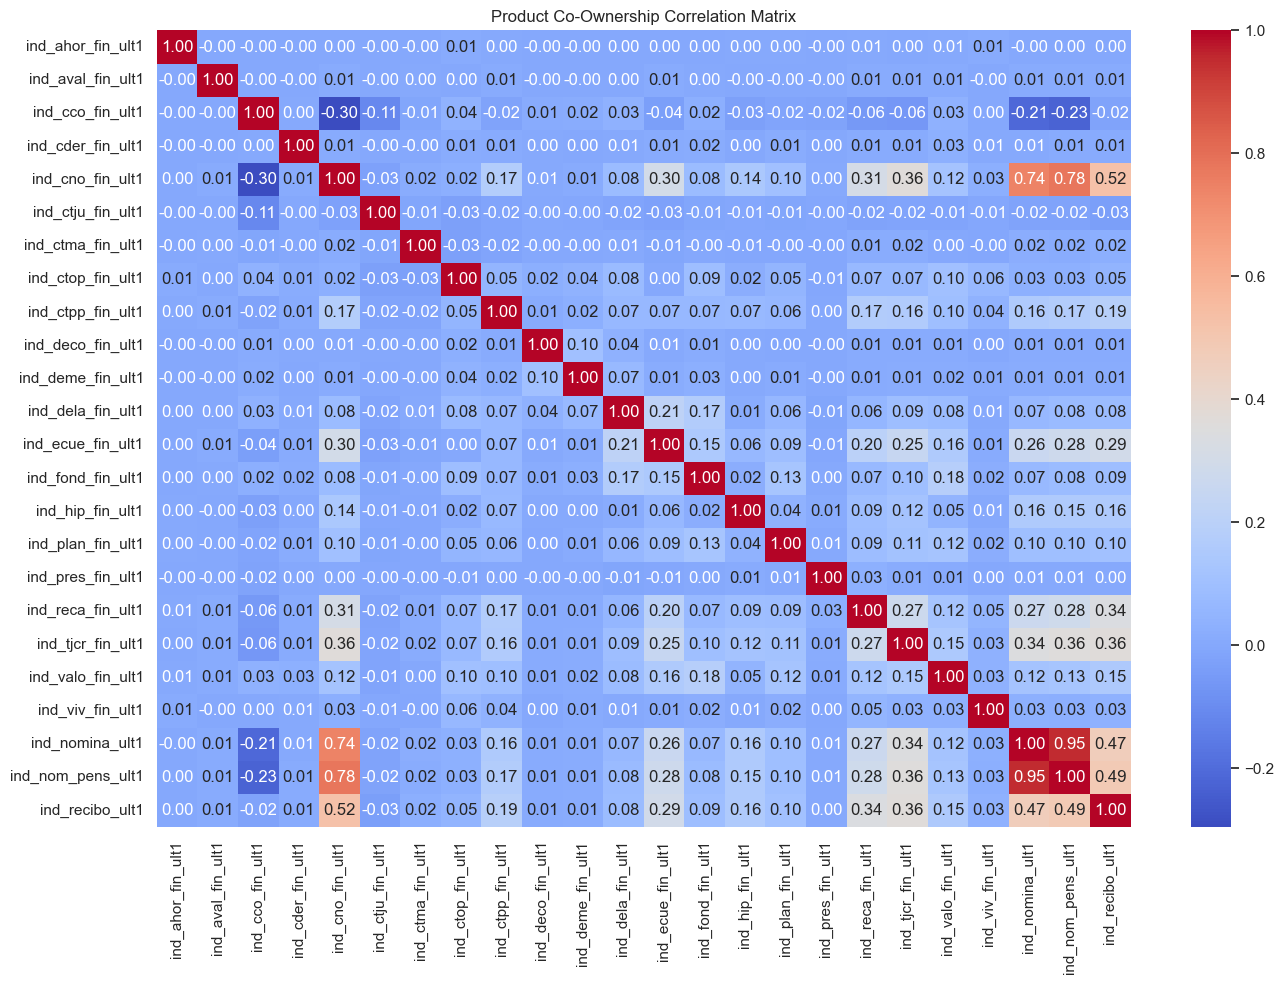

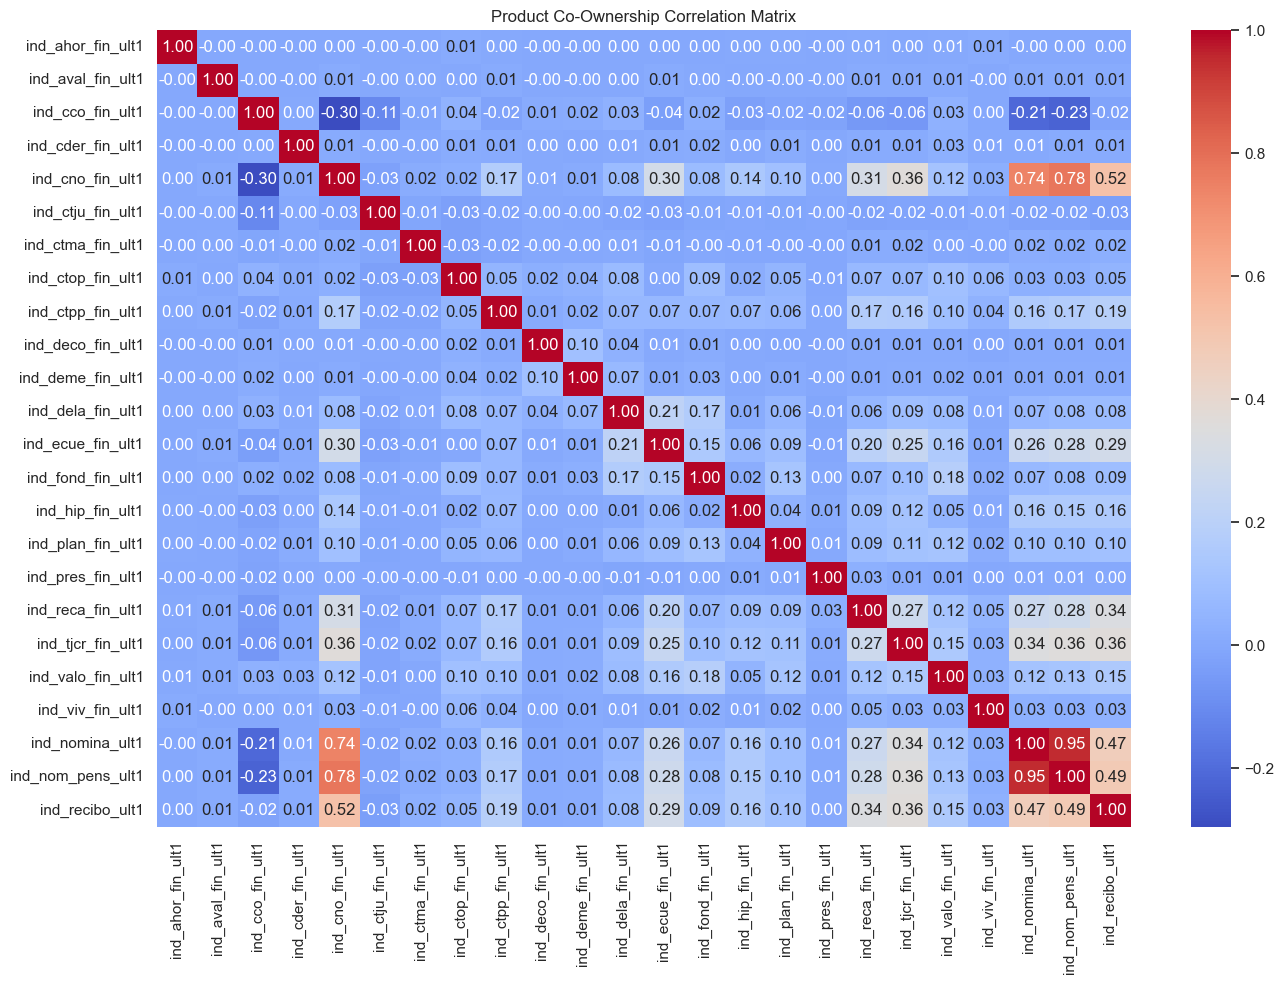

In [20]:
# Compute correlation matrix of product ownership
product_corr = df[product_columns].corr()

# Plot: Heatmap of Product Co-Ownership
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(product_corr, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
ax.set_title('Product Co-Ownership Correlation Matrix')

plt.tight_layout()
fig

9: Anomaly Detection :

(<Figure size 800x400 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x600 with 1 Axes>)

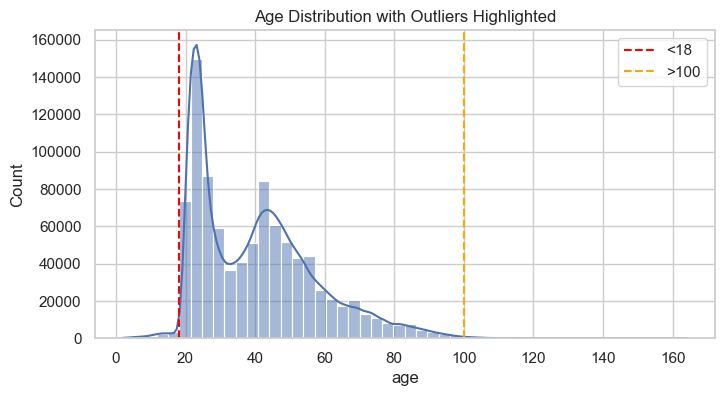

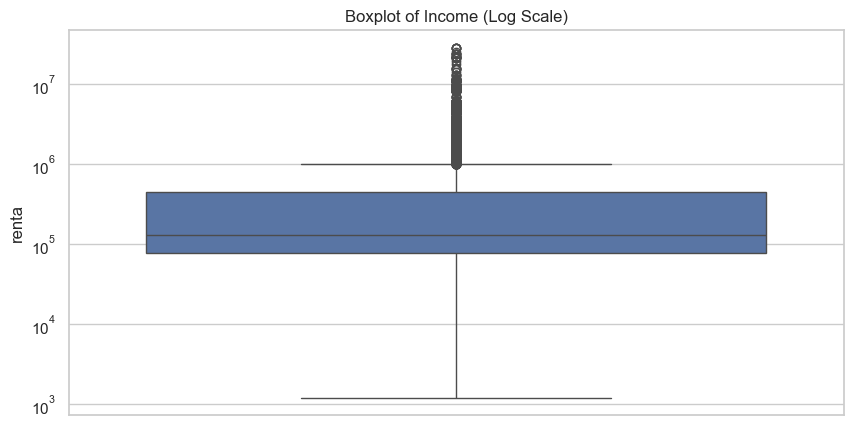

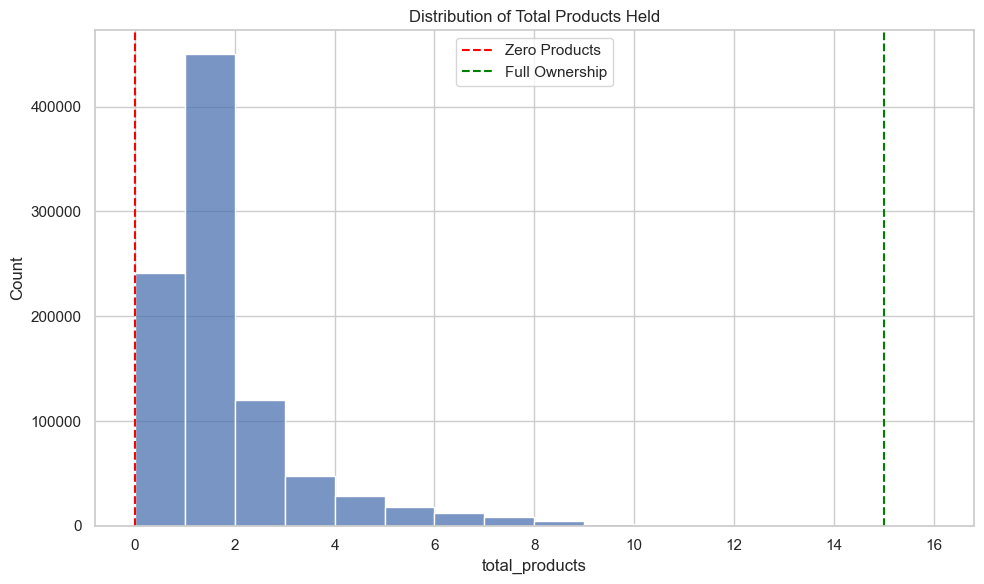

In [22]:
# Age outliers
extreme_ages = df[(df['age'] < 18) | (df['age'] > 100)]

# Income outliers
high_income = df[df['renta'] > df['renta'].quantile(0.99)]

# Product ownership extremes
full_owners = df[df['total_products'] == df['total_products'].max()]
zero_owners = df[df['total_products'] == 0]

# Plot 1: Extreme Ages
fig1, ax1 = plt.subplots(figsize=(8, 4))
sns.histplot(df['age'], bins=50, kde=True, ax=ax1)
ax1.axvline(18, color='red', linestyle='--', label='<18')
ax1.axvline(100, color='orange', linestyle='--', label='>100')
ax1.set_title('Age Distribution with Outliers Highlighted')
ax1.legend()

# Plot 2: Income Outliers
fig2, ax2 = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df[df['renta'].notnull()], y='renta', ax=ax2)
ax2.set_yscale('log')
ax2.set_title('Boxplot of Income (Log Scale)')

# Plot 3: Product Count Extremes
fig3, ax3 = plt.subplots(figsize=(10, 6))
sns.histplot(df['total_products'], bins=range(0, int(df['total_products'].max())+2), kde=False, ax=ax3)
ax3.set_title('Distribution of Total Products Held')
ax3.axvline(0, color='red', linestyle='--', label='Zero Products')
ax3.axvline(df['total_products'].max(), color='green', linestyle='--', label='Full Ownership')
ax3.legend()

plt.tight_layout()
(fig1, fig2, fig3)